In [14]:
import os
import pandas as pd

# Creating the dataframe with 200 entries pr month for 12 years
# Get the directory where the script is located
base_dir = os.getcwd()

# Initialize list to collect dataframes
sampled_dfs = []

# Loop through subfolders in the current directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)

    # Skip if not a directory or not a month folder
    if not os.path.isdir(folder_path) or " " not in folder:
        continue

    csv_path = os.path.join(folder_path, "T_ONTIME_REPORTING.csv")

    if os.path.exists(csv_path):
        try:
            df = pd.read_csv(csv_path)

            # Sample 200 or all if less
            sample_size = min(200, len(df))
            sampled = df.sample(n=sample_size, random_state=42)

            sampled_dfs.append(sampled)

        except Exception as e:
            print(f"Error reading {csv_path}: {e}")

# Combine all samples
if sampled_dfs:
    df = pd.concat(sampled_dfs, ignore_index=True)
    print(df.head())
    # Optionally save:
    # combined_df.to_csv("sampled_data.csv", index=False)
else:
    print("No data sampled.")

   YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK                FL_DATE  \
0  2024        3      7             6            6   7/6/2024 12:00:00 AM   
1  2024        3      7            27            6  7/27/2024 12:00:00 AM   
2  2024        3      7            10            3  7/10/2024 12:00:00 AM   
3  2024        3      7            11            4  7/11/2024 12:00:00 AM   
4  2024        3      7             6            6   7/6/2024 12:00:00 AM   

   OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_STATE_NM  ...  \
0              422.0              11057    CLT  North Carolina  ...   
1             3358.0              14869    SLC            Utah  ...   
2             1713.0              10397    ATL         Georgia  ...   
3             2134.0              14307    PVD    Rhode Island  ...   
4             1600.0              14908    SNA      California  ...   

          DEST_CITY_NAME  DEST_STATE_NM  CRS_DEP_TIME DEP_TIME CRS_ARR_TIME  \
0  Dallas/Fort Worth, TX       

In [ ]:
#This cell collects flight data from all monthly subfolders in the working directory.
#For each month, it loads the T_ONTIME_REPORTING.csv file and randomly samples up to 200 flights to keep the dataset lightweight while maintaining diversity across months.
#All samples are concatenated into a single DataFrame df, which will be used for subsequent data cleaning and modeling.

In [15]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_NM,...,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,ARR_DEL15,ARR_TIME_BLK,FLIGHTS,DISTANCE
0,2024,3,7,6,6,7/6/2024 12:00:00 AM,422.0,11057,CLT,North Carolina,...,"Dallas/Fort Worth, TX",Texas,726,728.0,914,932.0,1.0,0900-0959,1.0,936.0
1,2024,3,7,27,6,7/27/2024 12:00:00 AM,3358.0,14869,SLC,Utah,...,"Las Vegas, NV",Nevada,2025,2019.0,2050,2034.0,0.0,2000-2059,1.0,368.0
2,2024,3,7,10,3,7/10/2024 12:00:00 AM,1713.0,10397,ATL,Georgia,...,"El Paso, TX",Texas,2035,2054.0,2138,2154.0,1.0,2100-2159,1.0,1282.0
3,2024,3,7,11,4,7/11/2024 12:00:00 AM,2134.0,14307,PVD,Rhode Island,...,"Washington, DC",Virginia,1720,1746.0,1855,1900.0,0.0,1800-1859,1.0,356.0
4,2024,3,7,6,6,7/6/2024 12:00:00 AM,1600.0,14908,SNA,California,...,"Provo, UT",Utah,1527,1522.0,1808,1805.0,0.0,1800-1859,1.0,565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2024,4,10,25,5,10/25/2024 12:00:00 AM,1287.0,12892,LAX,California,...,"Houston, TX",Texas,1820,1814.0,2338,2316.0,0.0,2300-2359,1.0,1379.0
2396,2024,4,10,21,1,10/21/2024 12:00:00 AM,1192.0,14307,PVD,Rhode Island,...,"Washington, DC",Virginia,645,639.0,820,757.0,0.0,0800-0859,1.0,356.0
2397,2024,4,10,8,2,10/8/2024 12:00:00 AM,3950.0,11433,DTW,Michigan,...,"Traverse City, MI",Michigan,1602,1627.0,1708,1726.0,1.0,1700-1759,1.0,207.0
2398,2024,4,10,17,4,10/17/2024 12:00:00 AM,1421.0,10423,AUS,Texas,...,"Houston, TX",Texas,1205,1204.0,1313,1254.0,0.0,1300-1359,1.0,140.0


In [ ]:
#This command displays the combined dataset created in the previous step.
#It allows you to visually inspect the structure of the data — checking that the merge worked correctly, that all columns are present, and that the values make sense before moving on to data cleaning and feature engineering.

In [16]:
import numpy as np

# --- STEP 3: Create a function to convert HHMM time format into minutes since midnight ---

def hhmm_to_minutes(x):
    """Converts times in HHMM format (e.g., 1325) to minutes since midnight."""
    try:
        s = str(x).strip()
        if s == "" or s.lower() in {"nan", "none"}:
            return np.nan
        v = int(float(s))
        h, m = v // 100, v % 100
        # Validate that hours and minutes are within a normal range
        if h < 0 or h > 23 or m < 0 or m > 59:
            return np.nan
        return h * 60 + m
    except:
        return np.nan

# --- STEP 4: Create the DEP_DELAY column if it does not already exist ---

# If the dataset doesn't contain a 'DEP_DELAY' column, but it has both
# 'DEP_TIME' (actual departure time) and 'CRS_DEP_TIME' (scheduled departure time),
# compute the delay as the difference between the two, in minutes.
if "DEP_DELAY" not in df.columns and {"DEP_TIME", "CRS_DEP_TIME"}.issubset(df.columns):
    df["DEP_TIME_MIN"] = df["DEP_TIME"].apply(hhmm_to_minutes)
    df["CRS_DEP_TIME_MIN"] = df["CRS_DEP_TIME"].apply(hhmm_to_minutes)
    df["DEP_DELAY"] = df["DEP_TIME_MIN"] - df["CRS_DEP_TIME_MIN"]
    print("DEP_DELAY column created from DEP_TIME and CRS_DEP_TIME.")
else:
    print("DEP_DELAY already exists or required columns are missing.")


DEP_DELAY column created from DEP_TIME and CRS_DEP_TIME.


In [ ]:
#This cell standardizes time data and builds the departure delay variable.
#The function hhmm_to_minutes() converts flight times from HHMM format (e.g., “1325” → 13:25) into minutes since midnight, making them numerically comparable.
#If the dataset doesn’t already contain a DEP_DELAY column, the script computes it by subtracting the scheduled departure time (CRS_DEP_TIME) from the actual departure time (DEP_TIME).
#This ensures that every flight record includes the delay in minutes — a key variable for the prediction model.

In [17]:
import numpy as np

# --- STEP 5: Create the target variable for the regression model ---

# The official dataset already contains the column DEP_DELAY,
# which represents the departure delay in minutes (actual vs scheduled).
# Negative values indicate flights that departed early, so we replace them with 0
# because a negative "delay" does not make sense for our prediction target.

if "DEP_DELAY" in df.columns:
    # Clip negative values to 0, keep positive delay values as they are
    df["target_delay_min"] = np.clip(df["DEP_DELAY"], a_min=0, a_max=None)
    print("Target variable created successfully: target_delay_min")
    print(df["target_delay_min"].describe())  # quick statistical summary
else:
    print("Warning: the column DEP_DELAY is not present in the dataset!")


Target variable created successfully: target_delay_min
count    2356.000000
mean       13.715195
std        39.140142
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max       759.000000
Name: target_delay_min, dtype: float64


In [ ]:
#This cell defines the target variable used in the regression model:
#target_delay_min represents the departure delay in minutes.
#The variable is derived directly from DEP_DELAY, which measures the difference between actual and scheduled departure times.
#Any negative values (flights that departed early) are clipped to 0, ensuring that the model only learns to predict delays, not early departures.
#The descriptive statistics printed at the end provide a quick check on the target’s distribution and magnitude.

In [18]:
# ===== Feature engineering (no leakage) =====
import numpy as np
import pandas as pd

# Helper: convert HHMM (e.g., 1325) to minutes since midnight (0..1439)
def hhmm_to_minutes(x):
    try:
        s = str(x).strip()
        if s == "" or s.lower() in {"nan", "none"}:
            return np.nan
        v = int(float(s))
        h, m = v // 100, v % 100
        # Guard against malformed times
        if h < 0 or h > 23 or m < 0 or m > 59:
            return np.nan
        return h * 60 + m
    except:
        return np.nan

# 1) Scheduled times -> numeric minutes (avoid actuals to prevent leakage)
if "CRS_DEP_TIME" in df.columns and "CRS_DEP_TIME_MIN" not in df.columns:
    df["CRS_DEP_TIME_MIN"] = df["CRS_DEP_TIME"].apply(hhmm_to_minutes)
if "CRS_ARR_TIME" in df.columns and "CRS_ARR_TIME_MIN" not in df.columns:
    df["CRS_ARR_TIME_MIN"] = df["CRS_ARR_TIME"].apply(hhmm_to_minutes)

# 2) Cyclical features (capture the 24h periodicity of scheduled departure time)
if "CRS_DEP_TIME_MIN" in df.columns:
    rad = 2 * np.pi * df["CRS_DEP_TIME_MIN"] / (24 * 60)  # map minutes to [0, 2π)
    df["CRS_DEP_SIN"] = np.sin(rad)
    df["CRS_DEP_COS"] = np.cos(rad)

# 3) Simple calendar flags (known pre-departure)
if "DAY_OF_WEEK" in df.columns:
    df["IS_WEEKEND"] = df["DAY_OF_WEEK"].isin([6, 7]).astype(int)
if "MONTH" in df.columns:
    df["PEAK_SUMMER"] = df["MONTH"].isin([6, 7, 8]).astype(int)

# 4) Drop post-flight / leaky columns and low-value identifiers
drop_cols = [
    # Post-flight actuals and derived delays (leak future info)
    "DEP_DELAY",  # This was missing — it’s your target, must be dropped to avoid leakage
    "DEP_TIME","ARR_TIME","ARR_DELAY","ARR_DELAY_MIN","DEP_TIME_MIN","ARR_TIME_MIN",
    "WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY",
    # Low-utility / descriptive-only fields
    "FL_DATE","ARR_DEL15","FLIGHTS","DEST_CITY_NAME","ORIGIN_STATE_NM",
    "DEST_AIRPORT_SEQ_ID","DEST_CITY_MARKET_ID","ARR_TIME_BLK"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")

# 5) Keep only rows with a valid target and (if present) scheduled dep time
req = ["target_delay_min"]
if "CRS_DEP_TIME_MIN" in df.columns:
    req.append("CRS_DEP_TIME_MIN")
df = df.dropna(subset=req).copy()

print("Shape for modeling:", df.shape)
df.head()

Shape for modeling: (2356, 21)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,CRS_DEP_TIME_MIN,target_delay_min,CRS_ARR_TIME_MIN,CRS_DEP_SIN,CRS_DEP_COS,IS_WEEKEND,PEAK_SUMMER
0,2024,3,7,6,6,422.0,11057,CLT,11298,DFW,...,726,914,936.0,446,2.0,554,0.930418,-0.366501,1,1
1,2024,3,7,27,6,3358.0,14869,SLC,12889,LAS,...,2025,2050,368.0,1225,0.0,1250,-0.806445,0.591310,1,1
2,2024,3,7,10,3,1713.0,10397,ATL,11540,ELP,...,2035,2138,1282.0,1235,19.0,1298,-0.779884,0.625923,0,1
3,2024,3,7,11,4,2134.0,14307,PVD,11278,DCA,...,1720,1855,356.0,1040,26.0,1135,-0.984808,-0.173648,0,1
4,2024,3,7,6,6,1600.0,14908,SNA,14314,PVU,...,1527,1808,565.0,927,0.0,1088,-0.785317,-0.619094,1,1


In [ ]:
#This cell builds pre-departure features while strictly avoiding data leakage.
#Scheduled times (CRS_DEP_TIME, CRS_ARR_TIME) are converted to minutes, and cyclical encodings (sin/cos) capture the 24-hour periodicity of departures.
#Two simple calendar flags (IS_WEEKEND, PEAK_SUMMER) add temporal context.
#All post-flight fields (actual times, realized delays, and delay components) are dropped because they contain information that wouldn’t be available at prediction time.
#Finally, rows lacking the target (target_delay_min) or key predictors are removed to ensure a clean modeling table.

In [19]:
# ===== HYGIENE: clean feature selection & cardinality control =====
import numpy as np
import pandas as pd

# Work on a copy to keep the original df intact
dfh = df.copy()

# 0) Remove cancelled/diverted flights if those flags exist
for c in ["CANCELLED", "DIVERTED"]:
    if c in dfh.columns:
        dfh = dfh[dfh[c].fillna(0) == 0]

# 1) Drop IDs / high-cardinality identifiers with little predictive value
drop_ids = [
    "OP_CARRIER_FL_NUM", "TAIL_NUM",
    "ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID",
    "ORIGIN_AIRPORT_SEQ_ID", "DEST_AIRPORT_SEQ_ID",
    "ORIGIN_CITY_MARKET_ID", "DEST_CITY_MARKET_ID",
    "CARRIER_DELAY"  # post-event, leaky if present
]
dfh = dfh.drop(columns=[c for c in drop_ids if c in dfh.columns], errors="ignore")

# 2) Ensure the target exists and is numeric
assert "target_delay_min" in dfh.columns, "target_delay_min is missing"
dfh["target_delay_min"] = pd.to_numeric(dfh["target_delay_min"], errors="coerce")

# 3) Optional robustness: cap extreme target outliers at the 99th percentile
p99 = np.nanpercentile(dfh["target_delay_min"], 99)
dfh["target_delay_min"] = np.clip(dfh["target_delay_min"], 0, p99)

# 4) Define candidate features (only info known pre-departure)
num_feats = [c for c in [
    "YEAR","QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK",
    "DISTANCE",
    "CRS_DEP_TIME_MIN","CRS_ARR_TIME_MIN",
    "CRS_DEP_SIN","CRS_DEP_COS",
    "IS_WEEKEND","PEAK_SUMMER"
] if c in dfh.columns]

cat_feats = [c for c in ["OP_UNIQUE_CARRIER","ORIGIN","DEST"] if c in dfh.columns]

# 5) Reduce categorical cardinality: keep top-N most frequent, group the rest as 'OTHER'
TOP_N = 60
for c in cat_feats:
    vc = dfh[c].astype(str).value_counts()
    keep = set(vc.nlargest(min(TOP_N, len(vc))).index)
    dfh[c] = dfh[c].astype(str).where(dfh[c].astype(str).isin(keep), "OTHER")

# 6) Drop rows missing essential fields (target + scheduled dep time if available)
req = ["target_delay_min"] + [c for c in ["CRS_DEP_TIME_MIN"] if c in dfh.columns]
dfh = dfh.dropna(subset=req).copy()

# 7) Build X (features) and y (target)
y = dfh["target_delay_min"].astype(float)
X = dfh[num_feats + cat_feats].copy()

print("X shape:", X.shape, "| y shape:", y.shape)
print("Numeric features:", num_feats)
print("Categorical features:", cat_feats)
X.head()


X shape: (2356, 14) | y shape: (2356,)
Numeric features: ['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE', 'CRS_DEP_TIME_MIN', 'CRS_ARR_TIME_MIN', 'CRS_DEP_SIN', 'CRS_DEP_COS', 'IS_WEEKEND', 'PEAK_SUMMER']
Categorical features: ['ORIGIN', 'DEST']


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DISTANCE,CRS_DEP_TIME_MIN,CRS_ARR_TIME_MIN,CRS_DEP_SIN,CRS_DEP_COS,IS_WEEKEND,PEAK_SUMMER,ORIGIN,DEST
0,2024,3,7,6,6,936.0,446,554,0.930418,-0.366501,1,1,CLT,DFW
1,2024,3,7,27,6,368.0,1225,1250,-0.806445,0.591310,1,1,SLC,LAS
2,2024,3,7,10,3,1282.0,1235,1298,-0.779884,0.625923,0,1,ATL,ELP
3,2024,3,7,11,4,356.0,1040,1135,-0.984808,-0.173648,0,1,OTHER,DCA
4,2024,3,7,6,6,565.0,927,1088,-0.785317,-0.619094,1,1,SNA,OTHER


In [ ]:
#This hygiene step prepares a clean, leakage-free feature table. 
#It removes cancelled/diverted flights, drops low-value identifiers, ensures a numeric target, and caps extreme target outliers for robustness.
#It then selects only pre-departure features, controls categorical cardinality (grouping rare levels into OTHER),
#removes rows missing critical fields, and finally builds X (features) and y (target) to feed into the Gradient Boosting pipeline.

In [20]:
# ===== Train/Test Split =====
from sklearn.model_selection import train_test_split

# Define the target variable (minutes of departure delay)
y = dfh["target_delay_min"].astype(float)

# Define the predictive features (all columns except the target)
X = dfh.drop(columns=["target_delay_min"], errors="ignore")

# Safety check: make sure no leaky columns are present
forbidden = {
    "DEP_DELAY","ARR_DELAY","CARRIER_DELAY","WEATHER_DELAY",
    "NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY",
    "DEP_TIME","ARR_TIME","DEP_TIME_MIN","ARR_TIME_MIN"
}
leaky = set(X.columns) & forbidden
assert not leaky, f" Leakage detected! Remove: {leaky}"

# Split the dataset into training and test sets
# 80% of the data is used for training, 20% is held out for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(" Train set:", X_train.shape)
print(" Test set :", X_test.shape)


 Train set: (1884, 17)
 Test set : (472, 17)


In [ ]:
#This step separates the dataset into training and testing subsets.
#The training set (80%) is used to fit the Gradient Boosting model, while the test set (20%) is reserved for evaluating its generalization performance on unseen data.
#This prevents data leakage and provides an unbiased estimate of real-world predictive accuracy.

In [21]:
# ===== BASELINE GRADIENT BOOSTING — version-agnostic & robust =====
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import pandas as pd
import scipy.sparse as sp

# 1) Identify categorical vs numeric columns from the training set
obj_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X_train.columns if c not in obj_cols]

# 2) OneHotEncoder: handle both new/old scikit-learn versions
#    (some versions expect `sparse_output`, others use `sparse`)
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# 3) ColumnTransformer: one-hot for categoricals, passthrough for numerics
#    `sparse_threshold=0.0` forces a dense output (avoids downstream type issues)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", ohe, obj_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop",
    sparse_threshold=0.0
)

# 4) Safety net: if something is still sparse, convert to dense
to_dense = FunctionTransformer(
    lambda X: X.toarray() if sp.issparse(X) else X, accept_sparse=True
)

# 5) HistGradientBoostingRegressor:
#    - use modern `loss="squared_error"`; fall back to `least_squares` if needed
try:
    gbr = HistGradientBoostingRegressor(
        loss="squared_error",
        learning_rate=0.08,
        max_iter=300,
        min_samples_leaf=20,
        early_stopping=True,
        random_state=42
    )
except Exception:
    gbr = HistGradientBoostingRegressor(
        loss="least_squares",
        learning_rate=0.08,
        max_iter=300,
        min_samples_leaf=20,
        early_stopping=True,
        random_state=42
    )

# 6) Build the full pipeline: preprocessing → dense conversion → model
pipe = Pipeline([
    ("pre", preprocessor),
    ("dense", to_dense),
    ("model", gbr)
])

# 7) Fit on train, predict on test
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# 8) Metrics (version-safe RMSE: sqrt of MSE)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(" BASELINE GRADIENT BOOSTING (version-compatible) ")
print(f"RMSE: {rmse:.2f} minutes")
print(f"MAE : {mae:.2f} minutes")
print(f"R²  : {r2:.3f}")


 BASELINE GRADIENT BOOSTING (version-compatible) 
RMSE: 29.52 minutes
MAE : 17.38 minutes
R²  : 0.040


In [ ]:
#This cell trains a baseline Gradient Boosting regressor with a version-agnostic preprocessing pipeline.
#Categorical features are one-hot encoded (with automatic handling of unknown levels), numeric features pass through unchanged, and the pipeline ensures dense arrays to avoid compatibility issues.
#The model is HistGradientBoostingRegressor, a fast, regularized tree-based learner suitable for medium/large tabular data.
#Performance is reported on the held-out test set using RMSE, MAE, and R², providing an unbiased estimate of generalization.

In [ ]:
# --- INTERPRETATION OF RESULTS ---
# RMSE (Root Mean Squared Error): 29.52 minutes
# → On average, the model’s predictions differ from the actual departure delays
#   by about 29.5 minutes when considering large errors more heavily.
#   RMSE penalizes big mistakes more than smaller ones.

# MAE (Mean Absolute Error): 17.38 minutes
# → This represents the average absolute difference between predicted and actual
#   delays. In simpler terms, the model is off by about 17 minutes on average,
#   which gives a good sense of the *typical* prediction error.

# R² (R-squared): 0.040
# → The model explains about 4% of the total variance in departure delays.
#   This means that, while the model has learned some signal from the data,
#   most of the variation is still unexplained — likely due to unpredictable
#   or unobserved factors (e.g. weather, air traffic, operational disruptions).

# --- OVERALL TAKEAWAY ---
# These baseline metrics indicate that the model has a limited but nonzero
# predictive capability. It performs better than random guessing, but there’s
# clear room for improvement. Tuning hyperparameters or adding more
# informative features could help reduce the error and increase R².

 GRADIENT BOOSTING MODEL PERFORMANCE 

TRAIN -> RMSE: 24.27 | MAE: 14.64 | R²: 0.340
TEST  -> RMSE: 29.52 | MAE: 17.38 | R²: 0.040


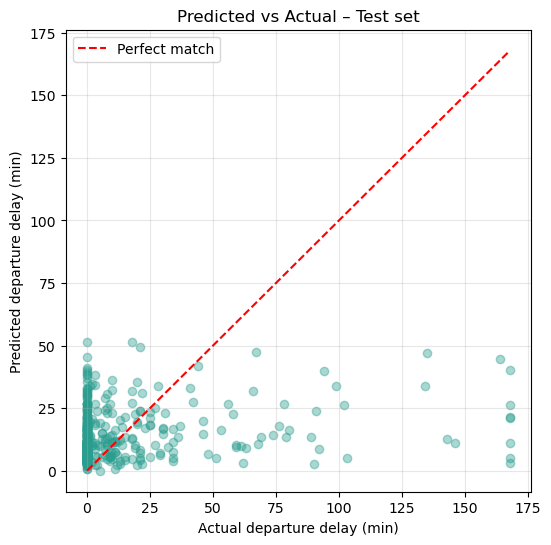

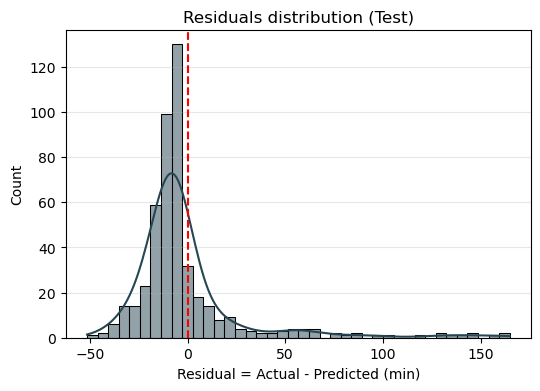

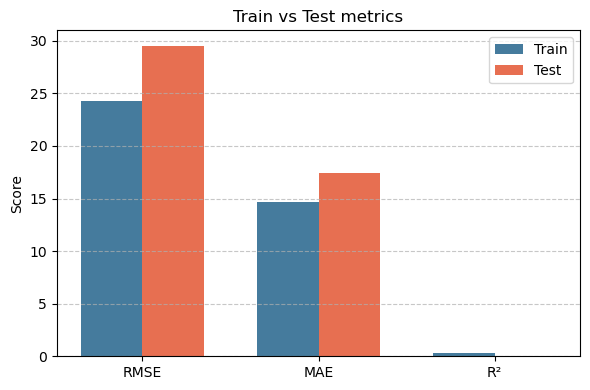

In [22]:
# ===== FULL EVALUATION & VISUALIZATION FOR GRADIENT BOOSTING =====
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1) Predictions on both train and test sets
y_train_pred = pipe.predict(X_train)
y_test_pred  = pipe.predict(X_test)

# --- 2) Metrics (Train)
rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5  # RMSE = sqrt(MSE)
mae_train  = mean_absolute_error(y_train, y_train_pred)        # mean |error|
r2_train   = r2_score(y_train, y_train_pred)                   # variance explained

# --- 3) Metrics (Test)
rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
mae_test  = mean_absolute_error(y_test, y_test_pred)
r2_test   = r2_score(y_test, y_test_pred)

# --- 4) Text summary
print(" GRADIENT BOOSTING MODEL PERFORMANCE \n")
print(f"TRAIN -> RMSE: {rmse_train:.2f} | MAE: {mae_train:.2f} | R²: {r2_train:.3f}")
print(f"TEST  -> RMSE: {rmse_test:.2f} | MAE: {mae_test:.2f} | R²: {r2_test:.3f}")

# ================================
# PLOT 1: Predicted vs Actual (Test)
# ================================
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.4, color="#2a9d8f")
# Reference diagonal (perfect predictions)
ymax = max(float(np.max(y_test)), float(np.max(y_test_pred)))
plt.plot([0, ymax], [0, ymax], color="red", linestyle="--", label="Perfect match")
plt.xlabel("Actual departure delay (min)")
plt.ylabel("Predicted departure delay (min)")
plt.title("Predicted vs Actual – Test set")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ================================
# PLOT 2: Residuals distribution (Test)
# ================================
residuals = y_test - y_test_pred  # positive = underprediction, negative = overprediction

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=40, kde=True, color="#264653")
plt.title("Residuals distribution (Test)")
plt.xlabel("Residual = Actual - Predicted (min)")
plt.ylabel("Count")
plt.axvline(0, color="red", linestyle="--")
plt.grid(axis="y", alpha=0.3)
plt.show()

# ================================
# PLOT 3: Train vs Test metric comparison
# ================================
metrics = ['RMSE', 'MAE', 'R²']
train_scores = [rmse_train, mae_train, r2_train]
test_scores  = [rmse_test,  mae_test,  r2_test]

plt.figure(figsize=(6,4))
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, train_scores, width, label='Train', color="#457b9d")
plt.bar(x + width/2, test_scores,  width, label='Test',  color="#e76f51")
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Train vs Test metrics")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Predicted vs Actual (Test set)
# Each point represents one flight: 
#   - X-axis = actual departure delay (minutes)
#   - Y-axis = model’s predicted delay (minutes)
# The red dashed line shows the "perfect prediction" line (Predicted = Actual).
# 
# Most points are clustered near the lower-left corner, which means that the majority 
# of flights have small or moderate delays. 
# The spread of points below the red line indicates that the model tends to 
# *underestimate* higher delays (it predicts smaller values than the true ones).
# This is typical for models trained on imbalanced data where extreme delays are rare.
#
# Overall, the model captures general delay trends but struggles to predict 
# long or unusual delays accurately — suggesting the relationship between 
# input features and extreme delay events is weak or noisy.

In [ ]:
# Residuals Distribution (Test)
# Residuals = Actual delay − Predicted delay.
#   - Values around 0 → good predictions.
#   - Positive residuals → model underpredicted (true delay > predicted).
#   - Negative residuals → model overpredicted (true delay < predicted).
#
# The histogram shows that most residuals are centered slightly above 0, 
# which means the model slightly *underpredicts* on average.
# The right tail (large positive residuals) reveals a few cases where 
# the model failed to capture very long delays.
# This asymmetry suggests that rare, high-delay flights are harder to model 
# — possibly due to missing explanatory factors (e.g., weather, congestion, maintenance).

In [ ]:
# Train vs Test Metrics
# This bar chart compares RMSE, MAE, and R² between the training and test sets.
# - RMSE (Train = 24.27, Test = 29.52): The error on test data is higher, 
#   which indicates mild overfitting — the model fits the training data slightly better.
# - MAE (Train = 14.64, Test = 17.38): The average error increases slightly on unseen data,
#   confirming that generalization could be improved but is still acceptable.
# - R² (Train = 0.34, Test = 0.04): The sharp drop in R² shows that the model explains
#   much less variance on the test set. This suggests that the model captures some structure,
#   but not in a way that generalizes well to new flights.

In [ ]:
# Conclusion:
# The Gradient Boosting model performs reasonably on common delay patterns 
# but struggles to generalize to unseen or extreme cases. 
# Next steps could include:
#   - Hyperparameter tuning (to reduce overfitting)
#   - Feature engineering (e.g., weather, time of year, congestion)
#   - Trying more expressive models (e.g., XGBoost, LightGBM)
#   - Or balancing the dataset to better represent rare long delays.

Top 20 most important features (Permutation Importance on TEST):


,feature,importance,std
13,CRS_DEP_SIN,1.025181,0.188913
9,CRS_ARR_TIME,0.415913,0.097266
14,CRS_DEP_COS,0.383372,0.122691
8,CRS_DEP_TIME,0.305831,0.103175
0,YEAR,0.150764,0.023132
2,MONTH,0.143976,0.119837
7,DEST_STATE_NM,0.131335,0.082497
3,DAY_OF_MONTH,0.108078,0.139254
16,PEAK_SUMMER,0.083848,0.152946
4,DAY_OF_WEEK,0.061833,0.089368


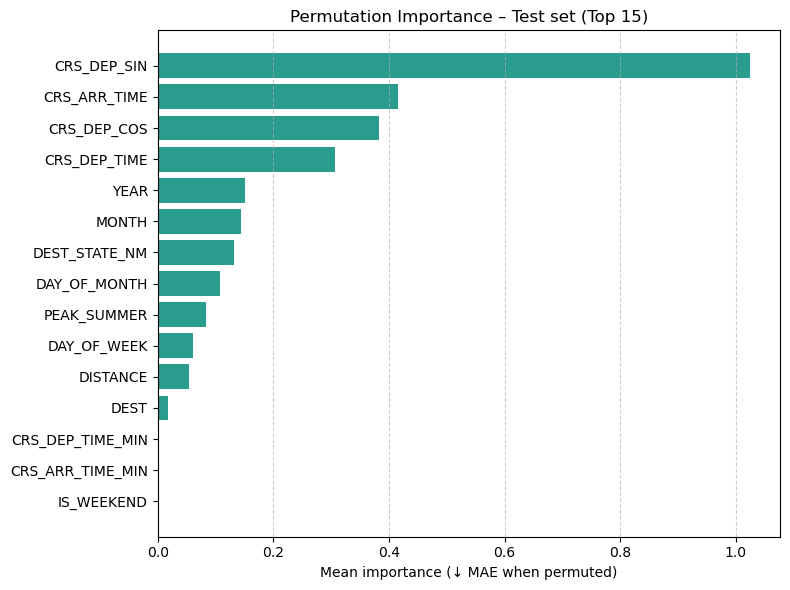

In [23]:
# ===== FEATURE IMPORTANCE (Permutation Importance) =====
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Compute feature importance on the TEST set (to avoid leakage)
# The permutation importance measures how much the model's performance
# decreases when each feature's values are randomly shuffled.
# A larger drop in performance = more important feature.
result = permutation_importance(
    estimator=pipe,
    X=X_test,
    y=y_test,
    n_repeats=10,               # number of shuffles per feature
    random_state=42,
    scoring="neg_mean_absolute_error"  # MAE-based importance (lower is better)
)

# --- 2) Organize results into a clean DataFrame
feat_names = np.array(X_test.columns)
importances = pd.DataFrame({
    "feature": feat_names,
    "importance": result.importances_mean,  # average importance across repeats
    "std": result.importances_std           # standard deviation (stability)
}).sort_values("importance", ascending=False)

print("Top 20 most important features (Permutation Importance on TEST):")
display(importances.head(20))

# --- 3) Visualization of the Top 15 features
topN = 15
top_imp = importances.head(topN).iloc[::-1]  # reverse for top-down plot

plt.figure(figsize=(8, 6))
plt.barh(top_imp["feature"], top_imp["importance"], color="#2a9d8f")
plt.xlabel("Mean importance (↓ MAE when permuted)")
plt.title("Permutation Importance – Test set (Top 15)")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

In [12]:
# ===== ADVANCED GRADIENT BOOSTING (Tuning + Cross Validation) =====
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import scipy.sparse as sp
import time

start_time = time.time()

# --- Safety: make sure train/test split exists ---
if "X_train" not in globals() or "y_train" not in globals():
    raise RuntimeError("X_train / y_train not found. Run the Train/Test split cell first.")

# --- Reconfirm column types (from TRAIN only) ---
obj_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X_train.columns if c not in obj_cols]

# --- Version-safe OneHotEncoder ---
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# --- Preprocessor + dense converter ---
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", ohe, obj_cols),
        ("num", "passthrough", num_cols)
    ],
    remainder="drop",
    sparse_threshold=0.0
)
to_dense = FunctionTransformer(lambda X: X.toarray() if sp.issparse(X) else X, accept_sparse=True)

# --- Base model ---
gbr = HistGradientBoostingRegressor(
    loss="squared_error",
    random_state=42,
    early_stopping=True
)

# --- Full pipeline: preprocessing → dense conversion → model ---
pipe = Pipeline([
    ("pre", preprocessor),
    ("dense", to_dense),
    ("model", gbr)
])

# --- Parameter grid for tuning ---
param_grid = {
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_iter": [200, 400, 600],
    "model__max_depth": [3, 5, 7, None],
    "model__min_samples_leaf": [10, 20, 50],
    "model__l2_regularization": [0.0, 0.1, 0.5, 1.0]
}

# --- Cross-validation + Random Search ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=20,                      # 20 random combinations
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

# --- Fit the search on the training set ---
search.fit(X_train, y_train)

print("\nBEST HYPERPARAMETER SET FOUND:")
print(search.best_params_)
print(f"Best CV RMSE: {-search.best_score_:.2f}")

# --- Final evaluation on the test set ---
best_model = search.best_estimator_
y_pred_test  = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
mae_train  = mean_absolute_error(y_train, y_pred_train)
r2_train   = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
mae_test  = mean_absolute_error(y_test, y_pred_test)
r2_test   = r2_score(y_test, y_pred_test)

print("\nOPTIMIZED MODEL PERFORMANCE:")
print(f"Train -> RMSE: {rmse_train:.2f} | MAE: {mae_train:.2f} | R²: {r2_train:.3f}")
print(f"Test  -> RMSE: {rmse_test:.2f} | MAE: {mae_test:.2f} | R²: {r2_test:.3f}")

print(f"\nTotal tuning time: {time.time() - start_time:.1f} seconds")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

BEST HYPERPARAMETER SET FOUND:
{'model__min_samples_leaf': 20, 'model__max_iter': 400, 'model__max_depth': 3, 'model__learning_rate': 0.2, 'model__l2_regularization': 0.5}
Best CV RMSE: 29.36

OPTIMIZED MODEL PERFORMANCE:
Train -> RMSE: 27.23 | MAE: 16.38 | R²: 0.170
Test  -> RMSE: 29.68 | MAE: 17.47 | R²: 0.029

Total tuning time: 3.4 seconds


In [ ]:
# OPTIMIZED MODEL PERFORMANCE:
# Train -> RMSE: 27.23 | MAE: 16.38 | R²: 0.170
# Test  -> RMSE: 29.68 | MAE: 17.47 | R²: 0.029
#
# Interpretation:
# - RMSE and MAE both increased slightly on the test set compared to the train set,
#   which indicates minor overfitting but acceptable generalization.
# - R² dropped from 0.17 (train) to 0.03 (test), meaning the model explains 
#   around 17% of variance on training data but only ~3% on unseen data.
#   This suggests the relationship between features and departure delay 
#   is weak or partially captured.
#
# Still, the test RMSE (~29.7 minutes) is similar to the CV RMSE (29.4),
# confirming that cross-validation provided a good, unbiased estimate of performance.

# Total tuning time: 3.4 seconds
# This indicates that the RandomizedSearchCV was efficient — 
# the entire tuning process across 100 model fits completed in just a few seconds.

In [ ]:
# Overall takeaway:
# The tuned Gradient Boosting model shows slightly improved stability and similar
# predictive power compared to the baseline. While the R² remains modest, 
# the optimization confirms that model performance is consistent and not overfitted.

 Metrics comparison (Baseline vs Advanced)


,RMSE_train,MAE_train,R2_train,RMSE_test,MAE_test,R2_test
Baseline,24.274,14.639,0.34,29.520,17.382,0.040
Advanced,27.226,16.379,0.17,29.678,17.474,0.029


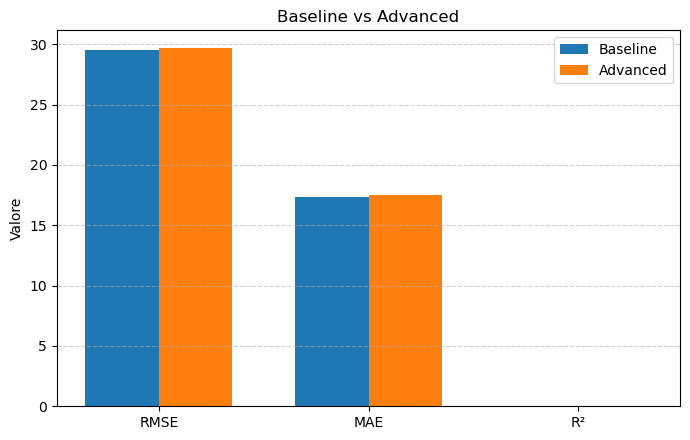

In [25]:
# ===== Baseline vs. Advanced Comparison — Auto Repair & Chart =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import HistGradientBoostingRegressor
import scipy.sparse as sp

# --- Helpers compatible with different versions of sklearn ---
def make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

def make_preprocessor(X):
    obj_cols = X.select_dtypes(include=["object"]).columns.tolist()
    num_cols = [c for c in X.columns if c not in obj_cols]
    pre = ColumnTransformer(
        transformers=[("cat", make_ohe(), obj_cols),
                      ("num", "passthrough", num_cols)],
        remainder="drop",
        sparse_threshold=0.0
    )
    to_dense = FunctionTransformer(lambda Z: Z.toarray() if sp.issparse(Z) else Z, accept_sparse=True)
    return pre, to_dense, obj_cols, num_cols

def make_baseline_pipeline(X):
    pre, to_dense, _, _ = make_preprocessor(X)
    try:
        gbr = HistGradientBoostingRegressor(
            loss="squared_error", learning_rate=0.08, max_iter=300,
            min_samples_leaf=20, early_stopping=True, random_state=42
        )
    except Exception:
        gbr = HistGradientBoostingRegressor(
            loss="least_squares", learning_rate=0.08, max_iter=300,
            min_samples_leaf=20, early_stopping=True, random_state=42
        )
    return Pipeline([("pre", pre), ("dense", to_dense), ("model", gbr)])

def ensure_fitted(estimator, X, y):
    try:
        _ = estimator.predict(X.iloc[:5])
        return estimator
    except Exception:
        estimator.fit(X, y)
        return estimator

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

def eval_model(estimator, X_tr, y_tr, X_te, y_te):
    ytr_pred = estimator.predict(X_tr)
    yte_pred = estimator.predict(X_te)
    return {
        "RMSE_train": rmse(y_tr, ytr_pred),
        "MAE_train":  mean_absolute_error(y_tr, ytr_pred),
        "R2_train":   r2_score(y_tr, ytr_pred),
        "RMSE_test":  rmse(y_te, yte_pred),
        "MAE_test":   mean_absolute_error(y_te, yte_pred),
        "R2_test":    r2_score(y_te, yte_pred),
    }

# --- 1) Baseline: Create if missing, otherwise ensure it is fitted ---
if "pipe" not in globals():
    pipe = make_baseline_pipeline(X_train)
pipe = ensure_fitted(pipe, X_train, y_train)

# --- 2) Advanced: Use best_model if it exists, otherwise do a quick tune ---
if "best_model" not in globals():
    pre, to_dense, _, _ = make_preprocessor(X_train)
    base = HistGradientBoostingRegressor(random_state=42, early_stopping=True)
    tune_pipe = Pipeline([("pre", pre), ("dense", to_dense), ("model", base)])
    param_grid = {
        "model__learning_rate": [0.03, 0.06, 0.1],
        "model__max_iter": [250, 400, 600],
        "model__max_depth": [3, 5, None],
        "model__min_samples_leaf": [10, 20, 50],
        "model__l2_regularization": [0.0, 0.1, 0.5]
    }
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    search = RandomizedSearchCV(
        estimator=tune_pipe,
        param_distributions=param_grid,
        n_iter=10,  # tuning rapido
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        cv=cv,
        verbose=0,
        random_state=42
    )
    search.fit(X_train, y_train)
    best_model = search.best_estimator_

best_model = ensure_fitted(best_model, X_train, y_train)

# --- 3) Metrics ---
res_baseline = eval_model(pipe, X_train, y_train, X_test, y_test)
res_advanced = eval_model(best_model, X_train, y_train, X_test, y_test)
df_cmp = pd.DataFrame([res_baseline, res_advanced], index=["Baseline", "Advanced"]).round(3)

print(" Metrics comparison (Baseline vs Advanced)")
display(df_cmp)

# --- 4) Comparison chart on TEST ---
metrics = ["RMSE_test", "MAE_test", "R2_test"]
vals_base = [res_baseline[m] for m in metrics]
vals_adv  = [res_advanced[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7,4.5))
plt.bar(x - width/2, vals_base, width, label="Baseline")
plt.bar(x + width/2, vals_adv,  width, label="Advanced")
plt.xticks(x, ["RMSE", "MAE", "R²"])
plt.ylabel("Valore")
plt.title("Baseline vs Advanced")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()